# Thư viện

In [1]:
import numpy as np
import pandas as pd # data

#plot
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image
from plotly import tools
import folium 
from folium import plugins 
import squarify

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

import os

# Load dataset

In [3]:
rail_data = pd.read_csv('thegurus-opendata-renfe-trips.csv')

In [3]:
rail_data.head(10)

,id,company,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,price,fare,seats,meta,insert_date
0,1,renfe,MADRID,BARCELONA,2019-04-18 05:50:00,2019-04-18 08:55:00,3.08,AVE,Preferente,68.95,Promo,NaN,{},2019-04-11 21:49:46
1,2,renfe,MADRID,BARCELONA,2019-04-18 13:25:00,2019-04-18 16:24:00,2.98,AVE-TGV,Turista,107.70,Flexible,NaN,{},2019-04-11 21:49:46
2,3,renfe,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,2.83,AVE,Turista,75.40,Promo,NaN,{},2019-04-11 21:49:46
3,4,renfe,MADRID,BARCELONA,2019-04-18 15:30:00,2019-04-18 18:40:00,3.17,AVE,Preferente,NaN,Promo,NaN,{},2019-04-11 21:49:46
4,5,renfe,MADRID,BARCELONA,2019-04-18 07:00:00,2019-04-18 09:30:00,2.50,AVE,Turista Plus,106.75,Promo,NaN,{},2019-04-11 21:49:46
5,6,renfe,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,2.83,AVE,Turista,75.40,Promo,NaN,{},2019-04-11 21:49:46
6,7,renfe,MADRID,BARCELONA,2019-04-18 07:30:00,2019-04-18 10:40:00,3.17,AVE,Turista Plus,90.50,Promo,NaN,{},2019-04-11 21:49:46
7,8,renfe,MADRID,BARCELONA,2019-04-18 19:00:00,2019-04-18 21:30:00,2.50,AVE,Preferente,115.65,Promo,NaN,{},2019-04-11 21:49:46
8,9,renfe,MADRID,BARCELONA,2019-04-18 08:00:00,2019-04-18 10:30:00,2.50,AVE,Turista,88.95,Promo,NaN,{},2019-04-11 21:49:46
9,10,renfe,MADRID,BARCELONA,2019-04-18 08:00:00,2019-04-18 10:30:00,2.50,AVE,Turista,88.95,Promo,NaN,{},2019-04-11 21:49:46


* **insert_date** : ngày mà dòng dữ liệu được đưa vào data => ngày đặt vé
* **origin /destination** : nơi khởi hành/ nơi đến
* **departure / arrival** : thời gian khởi hành/ thời gian đến 
* **fare** : loại vé (khuyến mãi, ưu đãi thương mại,...)
* **price** : euros
* **vehicle_class** : hạng vé (ticket class, tourist, business, etc.)
* **seats** : số lượng chỗ ngồi

In [4]:
print('Shape of rail data: ', rail_data.shape)

Shape of rail data:  (38753060, 14)


In [5]:
rail_data.describe()

,id,duration,price,seats
count,3.875306e+07,3.875306e+07,2.959311e+07,1.247421e+06
mean,1.937653e+07,2.778496e+00,5.822162e+01,2.210353e+02
std,1.118704e+07,1.486362e+00,2.476530e+01,7.232385e+01
min,1.000000e+00,3.700000e-01,0.000000e+00,6.000000e+00
25%,9.688266e+06,1.800000e+00,3.920000e+01,2.050000e+02
50%,1.937653e+07,2.530000e+00,5.570000e+01,2.390000e+02
75%,2.906480e+07,2.980000e+00,7.540000e+01,2.620000e+02
max,3.875306e+07,1.242000e+01,3.428000e+02,3.340000e+02


In [6]:
rail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38753060 entries, 0 to 38753059
Data columns (total 14 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id             int64  
 1   company        object 
 2   origin         object 
 3   destination    object 
 4   departure      object 
 5   arrival        object 
 6   duration       float64
 7   vehicle_type   object 
 8   vehicle_class  object 
 9   price          float64
 10  fare           object 
 11  seats          float64
 12  meta           object 
 13  insert_date    object 
dtypes: float64(3), int64(1), object(10)
memory usage: 4.0+ GB


Set **departure** và **arrival** bằng đơn vị thời gian: datetime64.

In [5]:
for item in ['insert_date', 'departure', 'arrival']:
    rail_data[item] = pd.to_datetime(rail_data[item])
rail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38753060 entries, 0 to 38753059
Data columns (total 14 columns):
 #   Column         Dtype         
---  ------         -----         
 0   id             int64         
 1   company        object        
 2   origin         object        
 3   destination    object        
 4   departure      datetime64[ns]
 5   arrival        datetime64[ns]
 6   duration       float64       
 7   vehicle_type   object        
 8   vehicle_class  object        
 9   price          float64       
 10  fare           object        
 11  seats          float64       
 12  meta           object        
 13  insert_date    datetime64[ns]
dtypes: datetime64[ns](3), float64(3), int64(1), object(7)
memory usage: 4.0+ GB


In [8]:
print(rail_data['fare'].unique())

['Promo' 'Flexible' nan 'Adulto ida' 'Promo +' 'Individual-Flexible'
 'Mesa' 'Grupos Ida' 'Doble Familiar-Flexible' 'COD.PROMOCIONAL' '4x100'
 'Básica' 'YOVOY']


# Truy các giá trị còn thiếu

In [4]:
print(rail_data.isnull().mean()*100)

id                0.000000
company           0.000000
origin            0.000000
destination       0.000000
departure         0.000000
arrival           0.000000
duration          0.000000
vehicle_type      0.000000
vehicle_class    20.731883
price            23.636712
fare             20.731883
seats            96.781103
meta              0.000000
insert_date       0.000000
dtype: float64


=> Các giá trị còn thiếu xuất hiện ở các cột: price, vehicle_class, fare, seats columns.

## Điền các giá trị thiếu
* Điền hai cột (none number): **vehicle_class** và **fare** với mode 

In [6]:
for i in ['vehicle_class', 'fare']: 
    rail_data[i].fillna(rail_data[i].mode()[0], inplace=True) 

* Điền các giá trị **price** dựa trên thông tin của cột **fare** 

Chia các chuyến tàu có cùng **fare** thành các nhóm , tính giá vé trung bình với từng nhóm và điền vào các chuyến tàu thiếu thông tin **price**.

In [7]:
rail_data.loc[rail_data.price.isnull(), 'price'] = rail_data.groupby('fare')['price'].transform('mean')

In [8]:
print(rail_data.isnull().any())

id               False
company          False
origin           False
destination      False
departure        False
arrival          False
duration         False
vehicle_type     False
vehicle_class    False
price            False
fare             False
seats             True
meta             False
insert_date      False
dtype: bool


# Xem ngày đầu tiên và ngày cuối cùng dữ liệu được đưa vào dataset

In [9]:
print("insert_date minimum value {}".format(rail_data.insert_date.min()))
print("insert_date maximum value {}".format(rail_data.insert_date.max()))

insert_date minimum value 2019-04-11 21:49:46
insert_date maximum value 2020-10-07 12:00:00


In [10]:
print("start_date minimum value {}".format(rail_data.departure.min()))
print("start_date maximum value {}".format(rail_data.departure.max()))

start_date minimum value 2019-04-12 05:50:00
start_date maximum value 2020-12-05 21:55:00


In [11]:
print("end_date minimum value {}".format(rail_data.arrival.min()))
print("end_date maximum value {}".format(rail_data.arrival.max()))

end_date minimum value 2019-04-12 08:38:00
end_date maximum value 2020-12-05 23:40:12


# Rút trích đặc trưng
1. Trích xuất giờ khởi hành và giờ tới nơi của hành trình 
2. Kiểm tra xem có bao nhiêu chuyến tàu bắt đầu và kết thúc trong 1 ngày/ hơn 1 ngày 
3. Trích xuất thời gian di chuyển là bao nhiêu phút
4. Trích xuất thứ ngày trong tuần và trong tháng của chuyến tàu từ insert date

In [12]:
# 1. Trích xuất giờ khởi hành và giờ tới nơi của hành trình
rail_data['departure_hour'] = rail_data['departure'].dt.hour 
rail_data['arrival_hour'] = rail_data['arrival'].dt.hour

# 2. Kiểm tra xem có bao nhiêu chuyến tàu bắt đầu và kết thúc trong 1 ngày/ hơn 1 ngày
#np.where([condition], [value to choose], [elsewhere value])
rail_data['is_journey_end_on_sameday?'] = np.where(rail_data['departure'].dt.date == rail_data['arrival'], 'yes', 'no')

In [13]:
# Đưa thời gian di chuyển về minute
rail_data['travel_time_in_mins'] = rail_data['arrival'] - rail_data['departure']
rail_data['travel_time_in_mins'] = rail_data['travel_time_in_mins']/np.timedelta64(1,'m') #devide by mins in [timedelta64] data type.

In [14]:
rail_data['travel_time_in_mins'].head(10)

0    185.0
1    179.0
2    170.0
3    190.0
4    150.0
5    170.0
6    190.0
7    150.0
8    150.0
9    150.0
Name: travel_time_in_mins, dtype: float64

In [15]:
# Trích xuất thứ ngày trong tuần và trong tháng của chuyến tàu từ insert date
rail_data['journey_day_of_week'] = rail_data['insert_date'].dt.day_name()
rail_data['journey_month'] = rail_data['insert_date'].dt.month

In [16]:
rail_data['journey_day_of_week'].head(20)

0     Thursday
1     Thursday
2     Thursday
3     Thursday
4     Thursday
5     Thursday
6     Thursday
7     Thursday
8     Thursday
9     Thursday
10    Thursday
11    Thursday
12    Thursday
13    Thursday
14    Thursday
15    Thursday
16    Thursday
17    Thursday
18    Thursday
19    Thursday
Name: journey_day_of_week, dtype: object

In [17]:
rail_data['journey_month'].head(10)

0    4
1    4
2    4
3    4
4    4
5    4
6    4
7    4
8    4
9    4
Name: journey_month, dtype: int64

# Lấy kinh độ và vĩ độ của các nơi khởi hành, nơi đến

In [18]:
geolocator = Nominatim(user_agent = 'http')
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

dict_lati = {}
dict_longi = {}

#get a unique  from
for i in rail_data['origin'].unique():
    location = geocode(i)
    print('Location: ', location.address)
    print('Lati: ', location.latitude, ' - Longi: ', location.longitude)
    print('_'*20)
    dict_lati[i] = location.latitude
    dict_longi[i] = location.longitude

Location:  Madrid, Área metropolitana de Madrid y Corredor del Henares, Comunidad de Madrid, 28001, España
Lati:  40.4167047  - Longi:  -3.7035825
____________________
Location:  Sevilla, Andalucía, España
Lati:  37.3886303  - Longi:  -5.9953403
____________________
Location:  Barcelona, Barcelonès, Barcelona, Catalunya, 08001, España
Lati:  41.3828939  - Longi:  2.1774322
____________________
Location:  València, Comarca de València, València / Valencia, Comunitat Valenciana, España
Lati:  39.4697065  - Longi:  -0.3763353
____________________
Location:  Ponferrada, El Bierzo, León, Castilla y León, España
Lati:  42.5454124  - Longi:  -6.5938719
____________________
Location:  Granada, Comarca de la Vega de Granada, Granada, Andalucía, España
Lati:  37.183054  - Longi:  -3.6021928
____________________
Location:  Málaga, Málaga-Costa del Sol, Málaga, Andalucía, España
Lati:  36.7213028  - Longi:  -4.4216366
____________________
Location:  Córdoba, Andalucía, España
Lati:  37.8845813  - 

Nối nơi khởi hành -> nơi đến 

In [19]:
rail_data['start_lati'] = rail_data['origin'].map(dict_lati)
rail_data['start_longi'] = rail_data['origin'].map(dict_longi)

rail_data['end_lati'] = rail_data['destination'].map(dict_lati)
rail_data['end_longi'] = rail_data['destination'].map(dict_longi)

In [20]:
rail_data.head()

,id,company,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,price,...,departure_hour,arrival_hour,is_journey_end_on_sameday?,travel_time_in_mins,journey_day_of_week,journey_month,start_lati,start_longi,end_lati,end_longi
0,1,renfe,MADRID,BARCELONA,2019-04-18 05:50:00,2019-04-18 08:55:00,3.08,AVE,Preferente,68.950000,...,5,8,yes,185.0,Thursday,4,40.416705,-3.703582,41.382894,2.177432
1,2,renfe,MADRID,BARCELONA,2019-04-18 13:25:00,2019-04-18 16:24:00,2.98,AVE-TGV,Turista,107.700000,...,13,16,yes,179.0,Thursday,4,40.416705,-3.703582,41.382894,2.177432
2,3,renfe,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,2.83,AVE,Turista,75.400000,...,6,9,yes,170.0,Thursday,4,40.416705,-3.703582,41.382894,2.177432
3,4,renfe,MADRID,BARCELONA,2019-04-18 15:30:00,2019-04-18 18:40:00,3.17,AVE,Preferente,57.337979,...,15,18,yes,190.0,Thursday,4,40.416705,-3.703582,41.382894,2.177432
4,5,renfe,MADRID,BARCELONA,2019-04-18 07:00:00,2019-04-18 09:30:00,2.50,AVE,Turista Plus,106.750000,...,7,9,yes,150.0,Thursday,4,40.416705,-3.703582,41.382894,2.177432


# VẼ BIỂU ĐỒ

## Thống kê top các ngày có nhiều lượt khởi hành nhất

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



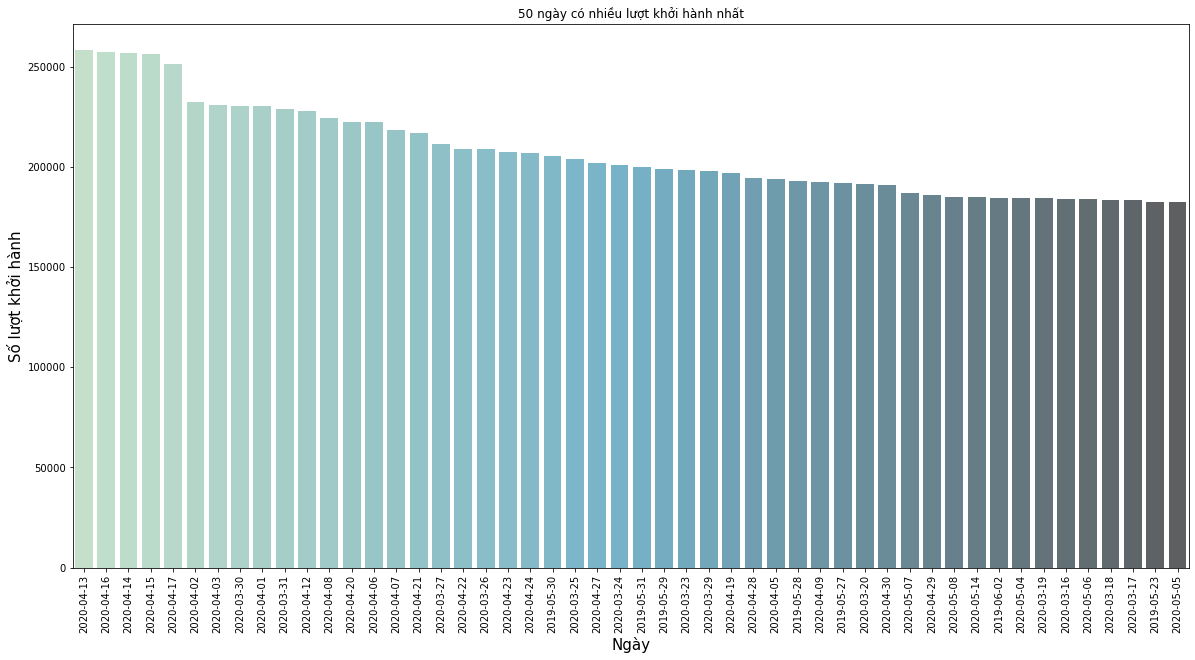

In [22]:
count = rail_data['departure'].dt.date.value_counts()
count = count[:50,]

plt.figure(figsize=(20,10))
sns.barplot(count.index, count.values, alpha=0.8, palette = "GnBu_d")

plt.title('50 ngày có nhiều lượt khởi hành nhất')
plt.xticks(rotation='vertical')
plt.ylabel('Số lượt khởi hành', fontsize=15)
plt.xlabel('Ngày', fontsize=15)

plt.show()

## Thống kê các chuyến tàu khởi hành và kết thúc cùng ngày và khác ngày

In [23]:
count = rail_data['is_journey_end_on_sameday?'].value_counts()
count = count.sort_index()
print(count)

#plot by circle graph
fig = {
  "data": [
    {
      "values": count.values,
      "labels": count.index,
      "domain": {"x": [0, .5]},
      "name": "% các chuyến tàu khởi hành và kết thúc cùng ngày",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"% các chuyến tàu khởi hành và kết thúc cùng ngày",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
             "text": "Pie Chart",
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)

no       692905
yes    38060155
Name: is_journey_end_on_sameday?, dtype: int64


=> Hầu hết các chuyến tàu khởi hành và kết thúc cùng ngày

## Thống kê giờ khởi hành các chuyến tàu
### Biểu đồ cột

In [24]:
import plotly.graph_objs as go

cnt_srs = rail_data['departure_hour'].value_counts()

data = go.Bar(x = cnt_srs.index, y = cnt_srs.values,\
               marker = dict(color = 'rgba(0, 95, 200, 0.8)',\
                            line = dict(color = 'rgb(0,123,0)', width = 0.2)),\
                text = cnt_srs.index)

layout = go.Layout(title = 'Giờ khởi hành của các chuyến tàu')

fig = go.Figure(data = data, layout = layout)
iplot(fig)

### Biểu đồ sao

In [25]:
cnt_srs = rail_data['departure_hour'].value_counts()
data = go.Scatter(\
                   x = cnt_srs.index,\
                   y = cnt_srs.values,\
                   mode = 'markers',\
                   marker = dict(color = 'rgba(100, 35, 55, 0.8)'))

layout = dict(title = 'Số lượng các chuyến tàu khởi hành theo giờ',\
             xaxis= dict(title= 'chuyến tàu / giờ', ticklen= 5, zeroline= False))

fig = dict(data = data, layout = layout)
iplot(fig)

=> Hầu hết các chuyến tàu khởi hành từ 6AM đến 9AM hoặc từ 2PM đến 7PM. Tầm giờ đó là giờ cao điểm

## Thống kê giờ kết thúc các chuyến tàu
### Biểu đồ cột

In [26]:
cnt_srs = rail_data['arrival_hour'].value_counts()
cnt_srs = cnt_srs[:50,]

data = go.Bar(\
                   x = cnt_srs.index,\
                   y = cnt_srs.values,\
                   marker = dict(color = 'rgba(170, 335, 55, 0.8)', line = dict(color = 'rgb(0,0,0)', width = 0.2)),\
                   text = cnt_srs.index)
 
layout = go.Layout(title = 'Thống kê giờ kết thúc của các chuyến tàu')

fig = dict(data = data, layout = layout)
iplot(fig)

### Biểu đồ sao

In [27]:
cnt_srs = rail_data['arrival_hour'].value_counts()
trace1 = go.Scatter(\
                   x = cnt_srs.index,\
                   y = cnt_srs.values,\
                   mode = 'markers',\
                   marker = dict(color = 'rgba(44, 135, 55, 0.8)'))
data = trace1
layout = dict(title = 'Số lượng các chuyến tàu khởi hành theo giờ',\
             xaxis= dict(title= 'chuyến tàu / giờ',ticklen= 5,zeroline= False))

fig = dict(data = data, layout = layout)
iplot(fig)

=> Hầu hết các chuyến tàu kết thúc từ 9AM đến 11AM hoặc từ 17PM đến 22PM. 

## Thống kê số chuyến tàu của các tháng

In [28]:
cnt_srs = rail_data['journey_month'].value_counts()
trace1 = go.Bar(\
                   x = cnt_srs.values,\
                   y = cnt_srs.index, orientation = 'h',\
                   marker = dict(color = 'rgba(170, 335, 55, 0.8)', line = dict(color = 'rgb(0,0,0)', width = 0.2)),\
                   text = cnt_srs.index)

data = [trace1]
layout = go.Layout(title = 'Thống kê số chuyến tàu mỗi tháng')

fig = dict(data = data, layout = layout)
iplot(fig)

=> Hầu hết các chuyến tàu nằm ở tháng 3

## Phân tích thời gian tàu chạy

In [29]:
print('Trung bình thời gian tàu chạy là {} phút \n Thời gian chạy ngắn nhất là {} phút \n Thời gian chạy dài nhất là {} phút'\
      .format(rail_data.travel_time_in_mins.mean(),rail_data.travel_time_in_mins.min(), rail_data.travel_time_in_mins.max()))

Trung bình thời gian tàu chạy là 166.70560868741728 phút 
 Thời gian chạy ngắn nhất là 22.0 phút 
 Thời gian chạy dài nhất là 745.0 phút


### Biểu đồ thống kê thời gian các chuyến tàu (dựa trên 40k quan sát) 

In [30]:
fig = ff.create_distplot([rail_data.travel_time_in_mins[:20]], ['travel_time_in_mins'], bin_size=5)
iplot(fig)

In [31]:
data = go.Box(
    y=rail_data.travel_time_in_mins[:20],
    name = 'Biểu đồ thống kê thời gian các chuyến tàu (dựa trên 40k quan sát)',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)

iplot([data])

## Thống kê lượt tàu của các ngày trong tuần

In [32]:
cnt_srs = rail_data['journey_day_of_week'].value_counts()
trace1 = go.Bar(
                x = cnt_srs.index,
                y = cnt_srs.values,
                marker = dict(color = 'rgba(55, 250, 55, 0.3)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = cnt_srs.index)

data = [trace1]
layout = go.Layout()
fig = go.Figure(data = data, layout = layout)
iplot(fig)

=> Hầu hết các chuyến tàu bắt đầu vào thứ 6 & thứ 7

# Phân tích vị trí khởi hành và kết thúc 
## Khoanh vùng vị trí với số lượng lượt khởi hành, vùng càng nhiều lượt khởi hành có vòng tròn càng lớn   

In [33]:
df = rail_data['origin'].value_counts()
df = pd.DataFrame(df)
df = df.reset_index()
df.columns = ['origin', 'counts'] 
df['start_lati']= df['origin'].map(dict_lati)
df['start_longi'] = df['origin'].map(dict_longi)

map1 = folium.Map(location=[40.4637, 3.7492], tiles='CartoDB dark_matter', zoom_start=5)
markers = []

for i, row in df.iterrows():
    loss = row['counts']
    if row['counts'] > 0:
        count = row['counts']*0.00003    
    folium.CircleMarker([float(row['start_lati']), float(row['start_longi'])], radius=float(count), color='#ef4f61', fill=True).add_to(map1)
    
map1

=> Hầu hết các chuyến tàu khởi hành ở thành phố Madrid

## Khoanh vùng vị trí với số lượng lượt kết thúc

In [34]:
df = rail_data['destination'].value_counts()
df = pd.DataFrame(df)
df = df.reset_index()
df.columns = ['origin', 'counts'] 
df['start_lati']= df['origin'].map(dict_lati)
df['start_longi'] = df['origin'].map(dict_longi)

map1 = folium.Map(location=[40.4637, 3.7492], tiles='CartoDB dark_matter', zoom_start=5)
markers = []

for i, row in df.iterrows():
    loss = row['counts']
    if row['counts'] > 0:
        count = row['counts']*0.00003    
    folium.CircleMarker([float(row['start_lati']), float(row['start_longi'])], radius=float(count), color='#ef4f61', fill=True).add_to(map1)
    
map1

=> Hầu hết các chuyến tàu cũng kết thúc ở thành phố Madrid

# Tạo Lộ trình

In [35]:
rail_data['route'] = rail_data['origin'] + ' to ' + rail_data['destination']
print('Tổng số các lộ trình trong dataset là: ', len(rail_data['route']))
print('Số các lộ trình riêng biệt trong dataset là: ', rail_data['route'].nunique())

Tổng số các lộ trình trong dataset là:  38753060
Số các lộ trình riêng biệt trong dataset là:  62


## Phân tích lộ trình bằng biểu đồ tròn

In [36]:
counts = rail_data['route'].value_counts()
counts = counts[:20]

fig = {
    'data': [
        {
            'values': counts.values,
            'labels': counts.index,
            'domain': {'x': [0, 0.6]},
            'name': 'Lộ trình',
            'hoverinfo':'percent + label',
            'hole': 0.5,
            'type': 'pie'
        },
    ],
    'layout':{
            'title':'Biểu đồ top 20 lộ trình được chọn nhiều nhất',
            'annotations': [
                { 'font': { 'size': 20},
                  'showarrow': False,
                'text': '',
                'x': 0.50,
                'y': 1
                },
            ]
        }
}

iplot(fig)

## Phân tích lộ trình bằng đồ thị cây (với 20 lộ trình được đi nhiều nhất)

In [37]:
x = 0
y = 0
width = 50
height = 50

# Liệt kê lộ trình
route_list = list(rail_data['route'].unique())

# Với mỗi lộ trình riêng biệt, đếm số lộ trình
values = [len(rail_data[rail_data['route'] == i]) for i in route_list]

values, route_list = zip(*sorted(zip(values, route_list), reverse=True))

route_list = route_list[:20]
values = values[:20]

# Normalize để vẽ biểu đồ
normed = squarify.normalize_sizes(values, width, height)
rectgs = squarify.squarify(normed, x, y, width, height)

color_code = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB','#494949']

shapes = []
annotations = []
counter = 0

for r in rectgs:
    # Shape của các ô 
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_code[counter]
        ) 
    )
    # Annotations
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(route_list[counter], values[counter]),
            showarrow = False
        )
    )
    # Vẽ những ô khác với index là counter
    counter = counter + 1
    if counter >= len(color_code):
        counter = 0
        

# Gán số lộ trình
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rectgs], 
    y = [ r['y']+(r['dy']/2) for r in rectgs],
    text = [ str(v) for v in values], 
    mode = 'text',
)

# Layout
layout = dict(
    height=1000,
    width=1250,
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# Kết hợp tất cả và vẽ
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='treemap')

=> Hầu hết các lộ trình đi từ Valencia đến Madrid 

# Phân tích các loại tàu cao tốc 
+ **Tàu AVE**: Tàu AVE hoạt động trên hệ thống đường ray 3100 km, là đường ray tốc độ cao dài nhất ở Châu Âu. Tàu AVE có thể chạy với tốc độ lên đến 310 km/h trên mạng lưới đường ray rộng lớn này, cho phép di chuyển một cách nhanh chóng giữa các thành phố ở Tây Ban Nha. Nó có thể đi từ Madrid đến Barcelona trong vòng chưa đầy 3 giờ! Hệ thống xe lửa hiện đại này kết nối nhiều thành phố trên khắp Tây Ban Nha từ Madrid và Barcelona, đến Córdoba, Seville, Málaga và Valencia. 
+ **ALVIA**: Các chuyến tàu Alvia của Tây Ban Nha kết hợp cả tuyến đường dài và dịch vụ tốc độ cao để kết nối các thành phố lớn trên khắp Tây Ban Nha. Alvia cung cấp nhiều tuyến đường như kết nối từ Madrid đến Gijón, Alicante và Castellón và từ Barcelona đến Bilbao, A Coruña và Vigo. Với các toa máy lạnh và check-in control trước khi lên tàu, Alvia là một sự lựa chọn thoải mái và thư giãn để đi qua một trong những quốc gia lớn nhất châu Âu. 
+ **NỘI TỈNH**: Các chuyến tàu nội địa tỉnh và liên tỉnh ở Tây Ban Nha. Các chuyến tàu nội tỉnh hoạt động ở phía bắc của Tây Ban Nha, kết nối các thành phố như Bilbao, Gijón, León và Santander. Đây là một mạng lưới các chuyến tàu hoạt động trong và xung quanh các thành phố lớn của Tây Ban Nha bao gồm Barcelona và Valencia. 
+ **LIÊN TỈNH**: Các chuyến tàu liên tỉnh truyền thống chạy với tốc độ từ 160 đến 250 km / h cho phép bạn đến gần như mọi ngóc ngách của Tây Ban Nha. Bạn có thể chọn đi hạng 2 (du lịch) hoặc hạng 1 (ưu tiên). Độ thoải mái của toa gần bằng với tàu cao tốc AVE. Tất cả các chuyến tàu đều có máy lạnh.
+ **AV City**: Các chuyến tàu của thành phố AV là tàu cao tốc bổ sung cho AVE, cung cấp giá thấp hơn và được bán trên thị trường ở hạng phổ thông và hạng phổ thông plus (p +).
+ **TRENHOTEL**: Trenhotel là các chuyến tàu đêm chạy ở Tây Ban Nha và từ Tây Ban Nha đến Bồ Đào Nha. Có nhiều loại tàu khác nhau được sử dụng, cung cấp các loại dịch vụ khác nhau. Các chuyến tàu cũ có ghế hạng 2, 4 giường, 2 giường và 2 giường với vòi sen tắm riêng và nhà vệ sinh. Các chuyến tàu mới hơn có ghế ngả hạng 1 và 2 giường nằm với vòi sen và nhà vệ sinh riêng. Tất cả các chuyến tàu đều có toa hàng nhỏ.
+ **LD,AVE-MD,AVE-LD,LD-MD,MD-AVE,MD,LD-AVE** là các chuyến tàu LD-MD là Long Distance/ Medium Distance 

## Phân tích loại tàu bằng biểu đồ tròn

In [38]:
count = rail_data['vehicle_type'].value_counts()
count = count[:15,]

In [39]:
fig = {
  "data": [
    {
      "values": count.values,
      "labels": count.index,
      "domain": {"x": [0, .5]},
      "name": '',
      "hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie"
    },],
  "layout": {
        "title":"Phân tích các loại tàu bằng biểu đồ tròn",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
             "text": "",
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)

=> Có tới 68.6% chuyến đi sử dụng tàu AVE, tiếp đó là ALVIA
Các chuyến tàu LD, MD ít được ưa chuộng hơn vì có hành trình dài hơn.

# Phân tích các hạng vé 
Các chuyến tàu ở TBN thường được chia làm 2 hạng vé:
+ **Turista**: bình dân
* **Preferente**: (hạng sang)

In [40]:
count = rail_data['vehicle_class'].value_counts()
count

Turista                     31905968
Turista con enlace           2780270
Preferente                   2237426
Turista Plus                 1680538
TuristaSólo plaza H           116765
PreferenteSólo plaza H         13853
Cama Turista                   13719
Turista Plus - Turista          2493
Turista - Turista Plus          1164
Cama G. Clase                    787
Turista PlusSólo plaza H          77
Name: vehicle_class, dtype: int64

In [41]:
fig = {
  "data": [
    {
      "values": count.values,
      "labels": count.index,
      "domain": {"x": [0, .5]},
      "name": '',
      "hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie"
    },],
  "layout": {
        "title":"Phân tích các hạng vé bằng biểu đồ tròn",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
             "text": "",
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)

=> Hầu hết hành khách chọn vé hạng phổ thông.

# Phân tích loại vé
+ **Promo**: Các chương trình khuyến mại này dựa trên hệ thống giá vé động với chiết khấu lớn với các chuyến tàu AVE và Larga Distancia (Đường dài) trên các hành trình nội địa, được thiết lập tùy thuộc vào chuyến tàu, ngày đi và lượt mua trước. 
+ **Flexible**: là chương trình ưu đãi thương mại chỉ dành cho các dịch vụ AVE và Larga Distancia (Đường dài) trên tất cả các hạng ghế và chỗ ngồi (chỗ ngồi và bến). Đây là mức giá tương tự như bình thường, không có bất kỳ chiết khấu nào, nhưng đi kèm với các ưu đãi bổ sung giúp hành khách có điều kiện tốt hơn để thay đổi, hủy chuyến hoặc nếu họ lỡ chuyến tàu của mình. 
+ **Promo +**: Các chương trình khuyến mại này dựa trên hệ thống giá vé động với chiết khấu lớn với các chuyến tàu AVE và Larga Distancia (Đường dài) trên các hành trình nội địa, được thiết lập tùy thuộc vào chuyến tàu, ngày đi và lượt mua trước. Nhưng không hạ thấp bất kỳ tiêu chuẩn chất lượng nào. 

In [42]:
count = rail_data['fare'].value_counts()
count

Promo                      24438335
Flexible                    8752421
Adulto ida                  2654965
Promo +                     2555707
YOVOY                        254188
Básica                        89487
COD.PROMOCIONAL                6792
Individual-Flexible             428
Doble Familiar-Flexible         359
Mesa                            320
Grupos Ida                       56
4x100                             2
Name: fare, dtype: int64

In [43]:
fig = {
  "data": [
    {
      "values": count.values,
      "labels": count.index,
      "domain": {"x": [0, .5]},
      "name": '',
      "hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie"
    },],
  "layout": {
        "title":"Phân tích các loại vé bằng biểu đồ tròn",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
             "text": "",
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)

=> Hầu hết hành khách chọn loại Promo, tiếp đến là Flexible.

# Phân tích Lộ trình với các yếu tố khác
## Phân tích Lộ trình với Loại tàu cao tốc

In [44]:
"""Code tạo dataframe chỉ chứa data của top 20 lộ trình được đi nhiều nhất.
"""

# Hợp 2 cột Lộ trình và loại tàu tương ứng. Từ mỗi lộ trình, đếm số chuyến đi cho mỗi loại tàu. 
# route_vhc_comb = rail_data.copy()

# temp_comb = route_vhc_comb['route'].value_counts()
# top_route = list(temp_comb.index.values)[:20]

# route_vhc_comb = route_vhc_comb[route_vhc_comb['route'].isin(top_route)]

# route_vhc_comb.groupby(['route','vehicle_type'])['vehicle_type'].count()

'Code tạo dataframe chỉ chứa data của top 20 lộ trình được đi nhiều nhất.\n'

In [45]:
print(rail_data.groupby(['route','vehicle_type'])['vehicle_type'].count())

route               vehicle_type
ALBACETE to MADRID  ALTARIA          71235
                    ALVIA           115977
                    AVE             261806
                    INTERCITY        22715
                    Intercity         1545
                                     ...  
ZARAGOZA to MADRID  LD-MD            10475
                    MD-AVE           34913
                    MD-LD            28147
                    REG.EXP.         34754
                    REGIONAL         29701
Name: vehicle_type, Length: 331, dtype: int64


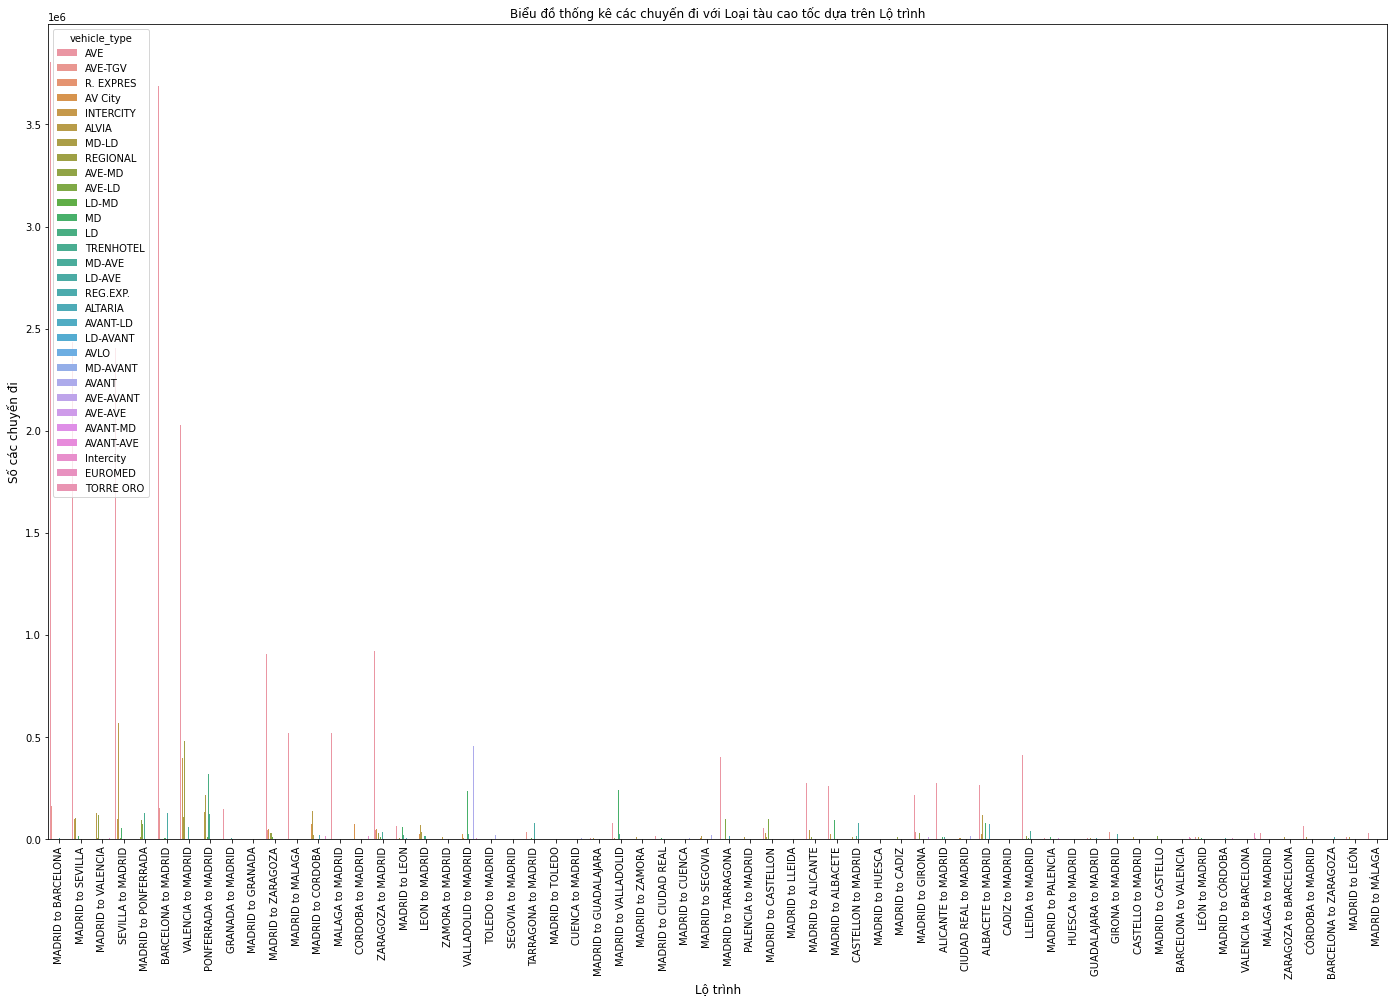

In [46]:
plt.figure(figsize=(24, 15))

sns.countplot(x= 'route', hue = 'vehicle_type', data = rail_data, alpha=1.0, linewidth=5)
plt.title('Biểu đồ thống kê các chuyến đi với Loại tàu cao tốc dựa trên Lộ trình')
plt.xticks(rotation='vertical')
plt.ylabel('Số các chuyến đi', fontsize=12)
plt.xlabel('Lộ trình', fontsize=12)
plt.show()

## Phân tích Lộ trình với Hạng vé

In [47]:
print(rail_data.groupby(['route','vehicle_class'])['vehicle_class'].count())

route               vehicle_class         
ALBACETE to MADRID  Preferente                  16993
                    Turista                    516792
                    Turista Plus                 8722
                    Turista con enlace          20528
ALICANTE to MADRID  Preferente                  15473
                                               ...   
ZARAGOZA to MADRID  Turista                   1022675
                    Turista - Turista Plus        766
                    Turista Plus                62372
                    Turista Plus - Turista        611
                    Turista con enlace          66873
Name: vehicle_class, Length: 236, dtype: int64


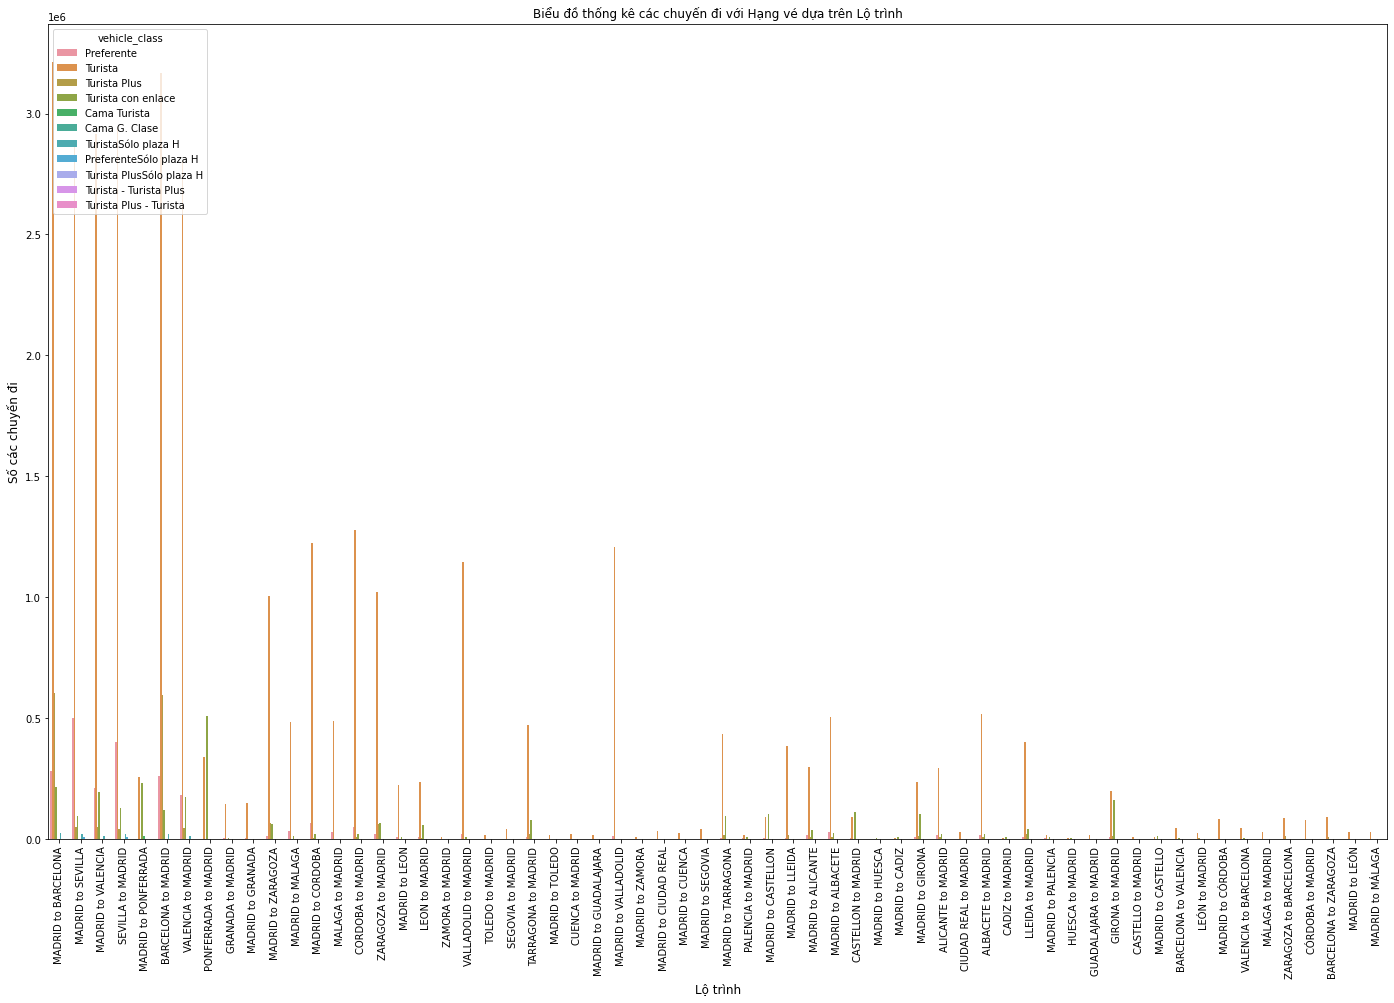

In [98]:
plt.figure(figsize=(24, 15))

sns.countplot(x= 'route', hue = 'vehicle_class', data = rail_data, alpha=1.0, linewidth=5)
plt.title('Biểu đồ thống kê các chuyến đi với Hạng vé dựa trên Lộ trình')
plt.xticks(rotation='vertical')
plt.ylabel('Số các chuyến đi', fontsize=12)
plt.xlabel('Lộ trình', fontsize=12)
plt.show()

## Phân tích Lộ trình với Loại vé

In [102]:
rail_data.groupby(['route','fare'])['fare'].count()

route               fare      
ALBACETE to MADRID  Adulto ida     40574
                    Flexible      104238
                    Promo         328058
                    Promo +        72900
                    YOVOY          17265
                                   ...  
ZARAGOZA to MADRID  Básica         18094
                    Flexible      332077
                    Promo         653178
                    Promo +        93899
                    YOVOY           9940
Name: fare, Length: 258, dtype: int64

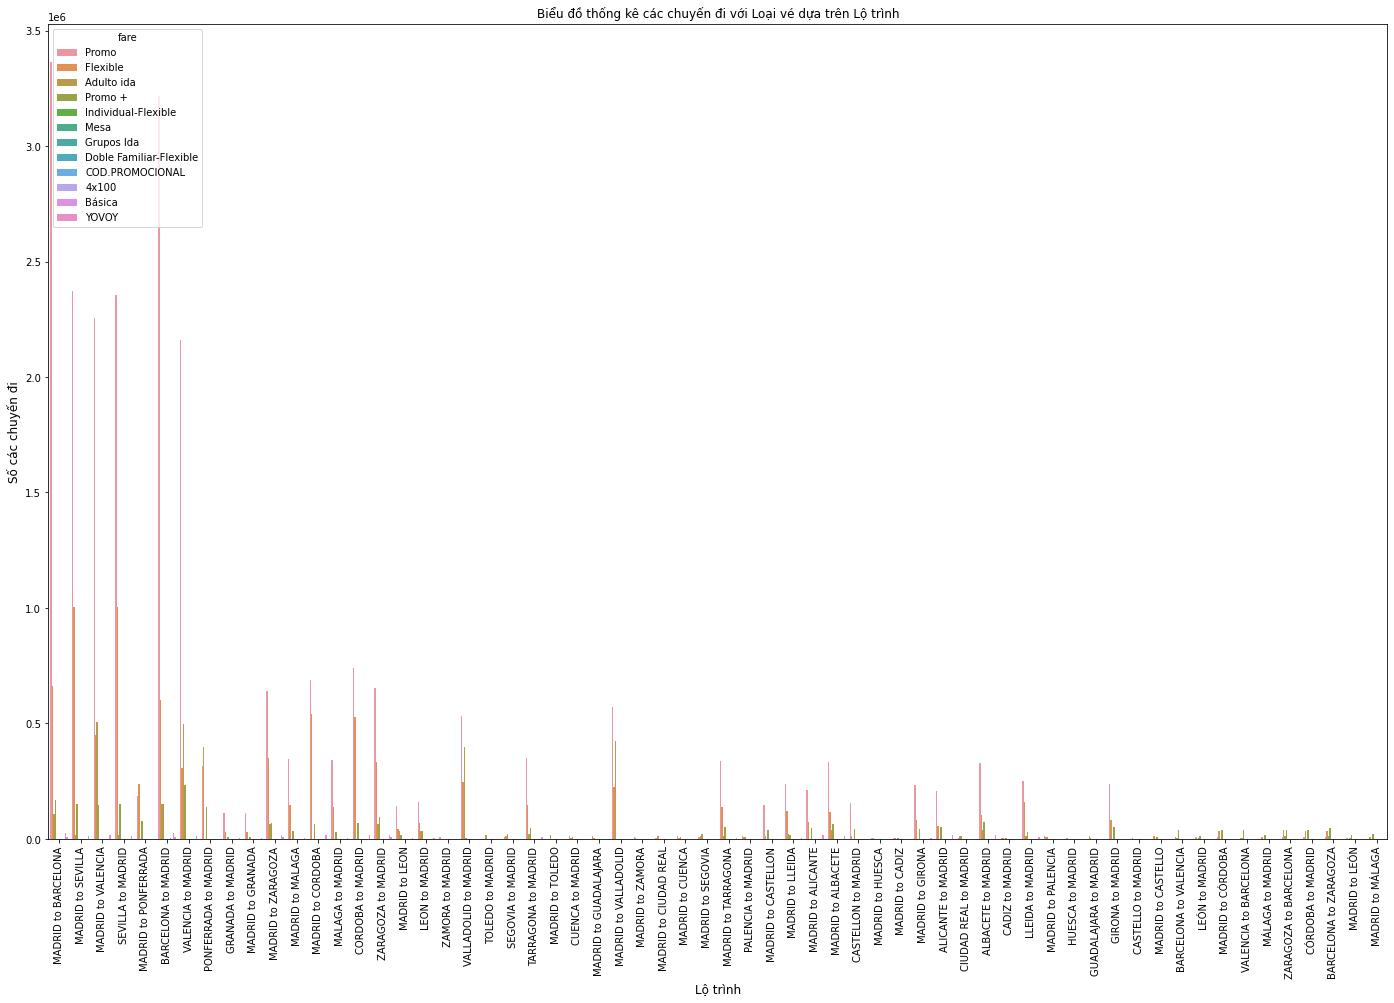

In [99]:
plt.figure(figsize=(24, 15))

sns.countplot(x= 'route', hue = 'fare', data = rail_data, alpha=1.0, linewidth=5)
plt.title('Biểu đồ thống kê các chuyến đi với Loại vé dựa trên Lộ trình')
plt.xticks(rotation='vertical')
plt.ylabel('Số các chuyến đi', fontsize=12)
plt.xlabel('Lộ trình', fontsize=12)
plt.show()

# Phân tích giá vé trung bình dựa trên Hạng vé, Loại tàu cao tốc, Lộ trình và Loại vé
## Biểu đồ cột

In [49]:
import chart_studio
chart_studio.tools.set_credentials_file(username='hoangtv21082000',
                                       api_key='WNAO9QN3QSpTHENLNAdS')

In [50]:
def horizontal_bar_chart(cnt_srs, color):
    trace = go.Bar(
        y=cnt_srs.index[::-1],
        x=cnt_srs.values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [56]:
# Tính giá vé trung bình với mỗi Hạng vé
cnt_srs = rail_data.groupby('vehicle_class')['price'].agg(['mean'])
cnt_srs = cnt_srs.sort_values(by="mean", ascending=False)
trace0 = horizontal_bar_chart(cnt_srs['mean'], 'rgba(50, 71, 96, 0.6)')

# Tính giá vé trung bình với mỗi Loại tàu cao tốc 
cnt_srs = rail_data.groupby('vehicle_type')['price'].agg(['mean'])
cnt_srs = cnt_srs.sort_values(by="mean", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs['mean'], 'rgba(71, 58, 131, 0.8)')

# Tính giá vé trung bình với mỗi Lộ trình
cnt_srs = rail_data.groupby('route')['price'].agg(['mean'])
cnt_srs = cnt_srs.sort_values(by="mean", ascending=False)
trace2 = horizontal_bar_chart(cnt_srs['mean'], 'rgba(246, 78, 139, 0.6)')

# Tính giá vé trung bình với mỗi Loại vé
cnt_srs = rail_data.groupby('fare')['price'].agg(['mean'])
cnt_srs = cnt_srs.sort_values(by="mean", ascending=False)
trace3 = horizontal_bar_chart(cnt_srs['mean'], 'rgba(200, 108, 39, 0.6)')

In [59]:
# Tạo biểu đồ
fig = tools.make_subplots(rows = 4, cols = 1, vertical_spacing=0.06,
                         subplot_titles = ['Giá vé trung bình với mỗi Hạng vé',\
                                           'Giá vé trung bình với mỗi Loại tàu cao tốc',\
                                           'Giá vé trung bình với mỗi Lộ trình',\
                                           'Giá vé trung bình với mỗi Loại vé'])
# Trace
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig.append_trace(trace3, 4, 1)

#Layout
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title='')

py.iplot(fig, filename='Biểu đồ đơn vị tiền: Euro')

## Biểu đồ sao

In [82]:
cnt_srs = rail_data.groupby('vehicle_class')['price'].agg(['mean'])
cnt_srs['vehicle_class'] = cnt_srs.index

data = [
    {
        'x': cnt_srs['vehicle_class'],
        'y': cnt_srs['mean'],
        'mode': 'markers+text',
        'textposition' : 'bottom center',
        'marker': {
            'color': "#d889f9",
            'size': 15,
            'opacity': 0.9
        }
    }
]

layout = go.Layout(title="Biểu đồ trung bình giá vé theo Hạng vé", 
                   xaxis=dict(title='Hạng vé'),
                   yaxis=dict(title='Giá vé trung bình (Euros)')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter0')

In [81]:
cnt_srs = rail_data.groupby('vehicle_type')['price'].agg(['mean'])
cnt_srs['vehicle_type'] = cnt_srs.index

data = [
    {
        'x': cnt_srs['vehicle_type'],
        'y': cnt_srs['mean'],
        'mode': 'markers+text',
        'textposition' : 'bottom center',
        'marker': {
            'color': "#f27da6",
            'size': 15,
            'opacity': 0.9
        }
    }
]

layout = go.Layout(title="Biểu đồ trung bình giá vé theo Loại tàu cao tốc", 
                   xaxis=dict(title='Loại tàu cao tốc'),
                   yaxis=dict(title='Giá vé trung bình (Euros)')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter1')

In [79]:
cnt_srs = rail_data.groupby('route')['price'].agg(['mean'])
cnt_srs['route'] = cnt_srs.index

data = [
    {
        'x': cnt_srs['route'],
        'y': cnt_srs['mean'],
        'mode': 'markers+text',
        'textposition' : 'bottom center',
        'marker': {
            'color': "#7ae6ff",
            'size': 12,
            'opacity': 0.9
        }
    }
]

layout = go.Layout(title="Biểu đồ trung bình giá vé theo Lộ trình", 
                   xaxis=dict(title='Lộ trình'),
                   yaxis=dict(title='Giá vé trung bình (Euros)')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter2')

In [80]:
cnt_srs = rail_data.groupby('fare')['price'].agg(['mean'])
cnt_srs['fare'] = cnt_srs.index

data = [
    {
        'x': cnt_srs['fare'],
        'y': cnt_srs['mean'],
        'mode': 'markers+text',
        'textposition' : 'bottom center',
        'marker': {
            'color': "#42f4bc",
            'size': 15,
            'opacity': 0.9
        }
    }
]

layout = go.Layout(title="Biểu đồ trung bình giá vé theo Loại vé", 
                   xaxis=dict(title='Loại vé'),
                   yaxis=dict(title='Giá vé trung bình (Euros)')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter3')

# Phân tích thời gian di chuyển trung bình dựa theo Lộ trình

In [78]:
cnt_srs = rail_data.groupby('route')['travel_time_in_mins'].agg(['mean'])
cnt_srs['route'] = cnt_srs.index

data = [
    {
        'x': cnt_srs['route'],
        'y': cnt_srs['mean'],
        'mode': 'markers+text',
        'textposition' : 'bottom center',
        'marker': {
            'color': "#d069f7",
            'size': 15,
            'opacity': 0.9
        }
    }
]

layout = go.Layout(title="Biểu đồ thời gian di chuyển trung bình dựa theo Lộ trình", 
                   xaxis=dict(title='Lộ trình'),
                   yaxis=dict(title='Thời gian di chuyển trung bình (mins)')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter4')

# Phân tích thời gian di chuyển trung bình dựa theo Loại tàu cao tốc

In [83]:
cnt_srs = rail_data.groupby('vehicle_type')['travel_time_in_mins'].agg(['mean'])
cnt_srs['vehicle_type'] = cnt_srs.index

data = [
    {
        'x': cnt_srs['vehicle_type'],
        'y': cnt_srs['mean'],
        'mode': 'markers+text',
        'textposition' : 'bottom center',
        'marker': {
            'color': "#d62728",
            'size': 15,
            'opacity': 0.9
        }
    }
]

layout = go.Layout(title="Biểu đồ thời gian di chuyển trung bình dựa theo Loại tàu cao tốc", 
                   xaxis=dict(title='Loại tàu cao tốc'),
                   yaxis=dict(title='Thời gian di chuyển trung bình (mins)')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter5')